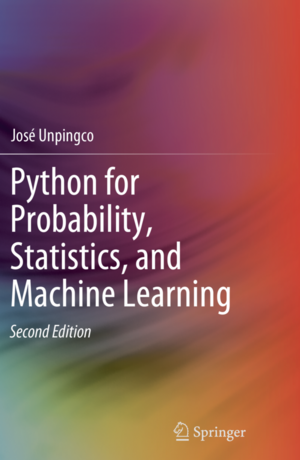

In [27]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

# Useful Distributions

## Normal Distribution



Without a doubt, the normal (Gaussian)
distribution is the most
important and foundational probability distribution.
The one-dimensional form
is the following:

$$
f(x) =\frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2 } }
$$

 where $\mathbb{E}(x)=\mu$ and $\mathbb{V}(x)=\sigma^2$.  The
multidimensional
version for $\mathbf{x}\in \mathbb{R}^n$ is the following,

$$
f(\mathbf{x}) = \frac{1}{\det(2\pi \mathbf{R})^{\frac{1}{2}}}
e^{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T
\mathbf{R}^{-1}(\mathbf{x}-\boldsymbol{\mu})}
$$

 where $\mathbf{R}$ is the covariance matrix with entries

$$
R_{i,j} = \mathbb{E}\left[ (x_i-\bar{x_i})(x_j-\bar{x_j}) \right]
$$

 A key property of the normal distribution is that it is completely
specified by
its first two moments. Another key property is that 
the normal distribution is
preserved under linear tranformations. 
For example,

$$
\mathbf{y} = \mathbf{A x}
$$

 means $\mathbf{y}\sim \mathcal{N}(\mathbf{A x},\mathbf{A R_x}
\mathbf{A}^T)$.
This means that it is easy to do linear algebra and matrix
operations with
normal distributed random variables.   There are many intuitive
geometric
relationships that are preserved with normal distributed random
variables, as
discussed in the Gauss-Markov chapter. 

## Multinomial Distribution


<!-- see
TheoPort p. 308 -->


The Multinomial distribution generalized the Binomial
distribution.
Recall that the Binomial distribution characterizes the number of
heads obtained 
in $n$ trials.
Consider the problem of $n$ balls to be  divided
among $r$  available bins
where each bin may accommodate more than one ball. For
example, suppose
$n=10$ and and $r=3$, then one possible valid configuration is
$\mathbf{N}_{10}=[3,3,4]$. The probability that a ball lands in the
$i^{th}$ bin
is $p_i$, where $\sum p_i=1$. The Multinomial distribution
characterizes the
probability distribution of $\mathbf{N}_n$.  The Binomial
distribution is a
special case of the Multinomial distribution with $n=2$. The
Multinomial
distribution is implmented in the `scipy.stats` module as shown
below,

In [28]:
from scipy.stats import multinomial
rv = multinomial(10,[1/3]*3)
rv.rvs(4)

array([[1, 5, 4],
       [1, 4, 5],
       [4, 2, 4],
       [4, 2, 4]])

Note that the sum across the columns is always $n$

In [29]:
rv.rvs(10).sum(axis=1)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

To derive the probability mass function, we define the *occupancy vector*,
$\mathbf{e}_i\in \mathbb{R}^r$ which is a binary vector with exactly one
non-
zero component (i.e., a unit vector). Then, the $\mathbf{N}_n$ vector can
be
written as the sum of $n$ vectors $\mathbf{X}$, each drawn from the set
$\lbrace
\mathbf{e}_j \rbrace_{j=1}^r$,

$$
\mathbf{N}_n = \sum_{i=1}^n  \mathbf{X}_i
$$

 where the probability $\mathbb{P}(\mathbf{X}=\mathbf{e}_j)=p_j$.  Thus,
$\mathbf{N}_n$ has a discrete distribution over the set of vectors with 
non-
negative components that sum to $n$. Because the $\mathbf{X}$ 
vectors are
independent and identically distributed, the 
probability of any particular
$\mathbf{N}_n=[ x_1,x_2,\cdots,x_r ]^\top=\mathbf{x}$ is

$$
\mathbb{P}(\mathbf{N}_n=x) = C_n p_1^{x_1} p_2^{x_2}\cdots p_r^{x_r}
$$

 where $C_n$ is a combinatorial factor that accounts for all the ways
a
component can sum to $x_j$. Consider that there are $\binom{n}{x_1}$ ways
that
the first component can be chosen. This leaves $n-x_1$ balls left for the
rest
of the vector components. Thus, the second component  has
$\binom{n-x_1}{x_2}$
ways to pick a ball. Following the same pattern, the
third component has
$\binom{n-x_1-x_2}{x_3}$ ways and so forth,

$$
C_n = \binom{n}{x_1}\binom{n-x_1}{x_2} \binom{n-x_1-x_2}{x_3} \cdots
\binom{n-x_1-x_2-\cdots-x_{r-1}}{x_r}
$$

  simplifies to the following,

$$
C_n = \frac{n!}{x_1! \cdots x_r!}
$$

 Thus, the probability mass function for the Multinomial distribution is the
following,

$$
\mathbb{P}(\mathbf{N}_n=x) = \frac{n!}{x_1! \cdots x_r!} p_1^{x_1}
p_2^{x_2}\cdots p_r^{x_r}
$$

 The expectation of this distribution is the following,

$$
\mathbb{E}(\mathbf{N}_n) = \sum_{i=1}^n \mathbb{E}(X_i)
$$

 by the linearity of the expectation. Then,

$$
\mathbb{E}(X_i) = \sum_{j=1}^r p_j \mathbf{e}_j =
\mathbf{I}\mathbf{p}=\mathbf{p}
$$

 where $p_j$ are the components of the vector $\mathbf{p}$ and 
$\mathbf{I}$ is
the identity matrix. Then, because this is the same for any $X_i$,
we have

$$
\mathbb{E}(\mathbf{N}_n) = n \mathbf{p}
$$

For the covariance of $\mathbf{N}_n$, we need to compute the following,

$$
\textrm{Cov}(\mathbf{N}_n) = \mathbb{E}\left(\mathbf{N}_n
\mathbf{N}_n^\top\right) - \mathbb{E}(\mathbf{N}_n)
\mathbb{E}(\mathbf{N}_n)^\top
$$

 For the first term on the right, we have

$$
\mathbb{E}\left(\mathbf{N}_n
\mathbf{N}_n^\top\right)=\mathbb{E}\left((\sum_{i=1}^n X_i)(\sum_{j=1}^n
X_j^\top) \right)
$$

 and for $i=j$, we have

$$
\mathbb{E}(X_i X_i^\top) = \textrm{diag}(\mathbf{p})
$$

 and for $i\neq j$, we have

$$
\mathbb{E}(X_i X_j^\top) = \mathbf{p}\mathbf{p}^\top
$$

 Note that this term has elements on the diagonal. Then, combining the
above two
equations gives the following,

$$
\mathbb{E}(\mathbf{N}_n\mathbf{N}_n^\top) = n \textrm{diag}(\mathbf{p}) +
(n^2-n) \mathbf{p}\mathbf{p}^\top
$$

 Now, we can assemble the covariance matrix,

$$
\textrm{Cov}(\mathbf{N}_n) = n \textrm{diag}(\mathbf{p}) + (n^2-n)
\mathbf{p}\mathbf{p}^\top - n^2 \mathbf{p} \mathbf{p}^\top = n
\textrm{diag}(\mathbf{p})-n \mathbf{p} \mathbf{p}^\top
$$

 Specifically, the off-diagonal terms are $n p_i p_j$ and the diagonal terms are
$n p_i (1-p_i)$.

## Chi-Square Distribution



The $\chi^2$ distribution
appears in many different contexts so it's worth
understanding.  Suppose we have
$n$ independent random variables
$X_i$ such that $X_i\sim \mathcal{N}(0,1)$.  We
are interested in the following
random variable $R = \sqrt{\sum_i X_i^2}$. The
joint probability density of
$X_i$ is the following,

$$
f_{\mathbf{X}}(X) = \frac{e^{-\frac{1}{2}\sum_i X_i^2}}{(2\pi)^{\frac{n}{2}}}
$$

 where the $\mathbf{X}$ represents a vector of $X_i$ random variables. You 
can
think of $R$ as the radius of an $n$-dimensional sphere. The volume of 
this
sphere is given by the the following formula,

$$
V_n(R) = \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)} R^n
$$

 To reduce the amount of notation we define,

$$
A := \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}
$$

 The differential of this volume is the following,

$$
dV_n(R)= n A R^{n-1} dR
$$

 In term of the $X_i$ coordinates, the probability (as always) 
integrates out
to one.

$$
\int f_{\mathbf{X}}(\mathbf{X}) dV_n(\mathbf{X}) = 1
$$

 In terms of $R$, the change of variable provides,

$$
\int f_{\mathbf{X}}(R) n A R^{n-1} dR
$$

 Thus,

$$
f_R(R):=f_{\mathbf{X}}(R)  = n A
R^{n-1}\frac{e^{-\frac{1}{2}R^2}}{(2\pi)^{\frac{n}{2}}}
$$

 But we are interested in the distribution $Y=R^2$. Using the same
technique
again,

$$
\int f_{R}(R) dR =\int f_{R}(\sqrt{Y}) \frac{dY}{2\sqrt{Y}}
$$

 Finally,

$$
f_Y(Y) := n A Y^\frac{n-1}{2}\frac{e^{-\frac{1}{2}Y}}{(2\pi)^{\frac{n}{2}}}
\frac{1}{2\sqrt{Y}}
$$

 Then, finally substituting back in $A$ gives the $\chi^2$ distribution with $n$
degrees of freedom,

$$
f_Y(Y) = n \frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}
Y^{n/2-1}\frac{e^{-\frac{1}{2}Y}}{(2\pi)^{\frac{n}{2}}} \frac{1}{2}=
\frac{2^{-\frac{n}{2}-1} n }{\Gamma \left(\frac{n}{2}+1\right)}e^{-Y/2}
Y^{\frac{n}{2}-1}
$$

**Example:** Hypothesis testing is a common application of the $\chi^2$
distribution.  Consider Table [1](#tab:diagnosisTable) which tabulates the
infection status of a certain population.  The hypothesis is that these data
are
distributed according to the multinomial distribution with the following
rates
for each group, $p_1=1/4$ (mild infection), $p_2=1/4$ (strong infection),
and
$p_3=1/2$ (no infection). Suppose $n_i$ is the count of persons in the
$i^{th}$
column and $\sum_{i} n_i=n=684$. Let $k$ denote the number of columns.
Then, in
order to apply the Central Limit Theorem, we want to sum the $n_i$
random
variables, but these all sum to $n$, a constant, which prohibits using
the
theorem. Instead, suppose we sum the $n_i$ variables up to $k-1$ terms. Then,

$$
z = \sum_{i=1}^{k-1} n_i
$$

 is asymptotically normally distributed by the theorem with mean
$\mathbb{E}(z)
= \sum_{i=1}^{k-1} n p_i$. Using our previous results and notation 
for
multinomial random variables, we can write this as

$$
z = [\mathbf{1}_{k-1}^\top,0]\mathbf{N}_n
$$

 where $\mathbf{1}_{k-1}$ is a vector of all ones of length $k-1$ and
$\mathbf{N}_n\in \mathbb{R}^{k}$. With this notation, we have

$$
\mathbb{E}(z )= n [\mathbf{1}_{k-1}^\top,0] \mathbf{p} = \sum_{i=1}^{k-1} n
p_i = n(1-p_k)
$$

 We can get the variance of $z$ using the same method,

$$
\mathbb{V}(z)
=[\mathbf{1}_{k-1}^\top,0]\textrm{Cov}(\mathbf{N}_n)[\mathbf{1}_{k-1}^\top,0]^\top
$$

 which gives,

$$
\mathbb{V}(z)
=[\mathbf{1}_{k-1}^\top,0](n\textrm{diag}(\mathbf{p})-n\mathbf{p}\mathbf{p}^\top
)[\mathbf{1}_{k-1}^\top,0]^\top
$$

 The variance is then,

$$
\mathbb{V}(z) = n (1-p_k)p_k
$$

 With the mean and variance established we can subtract the
hypothesize mean for
each column under the hypothesis and create the
transformed variable,

$$
z^\prime = \sum_{i=1}^{k-1} \frac{n_i-n p_i}{\sqrt{n (1-p_k)p_k}} \sim
\mathcal{N}(0,1)
$$

 by the Central Limit Theorem. Likewise,

$$
\sum_{i=1}^{k-1} \frac{(n_i-n p_i)^2}{n (1-p_k)p_k} \sim \chi_{k-1}^2
$$

<!-- Equation labels as ordinary links -->
<div id="tab:diagnosisTable"></div>
$$
\begin{table}[]
\centering
\caption{Diagnosis Table}
\label{tab:diagnosisTable} \tag{1}
\begin{tabular}{lllll}
\cline{1-4}
\multicolumn{1}{|l|}{Mild Infection} & \multicolumn{1}{l|}{Strong Infection}  &
\multicolumn{1}{l|}{No infection} & \multicolumn{1}{l|}{Total} &  \\ \cline{1-4}
\multicolumn{1}{|c|}{128}            & \multicolumn{1}{c|}{136}               &
\multicolumn{1}{c|}{420}           & \multicolumn{1}{c|}{684}  & \\ \cline{1-4}
\end{tabular}
\end{table}
$$

With all that established, we can test the hypothesis that the data in the table
follow the hypothesized multinomial distribution.

In [30]:
from scipy import stats
n = 684
p1 = p2 = 1/4
p3 = 1/2
v = n*p3*(1-p3)
z = (128-n*p1)**2/v + (136-n*p2)**2/v
1-stats.chi2(2).cdf(z)

0.00012486166748693073

This value is very low and suggests that the hypothesized multinomial
distribution is not a good one for this data. Note that this approximation only
works when `n` is large in comparison to the number of columns in the table.

##
Poisson and Exponential Distributions




The Poisson distribution for a random
variable $X$ represents a number of
outcomes occurring in a given time interval
($t$).

$$
p(x;\lambda t) = \frac{e^{-\lambda t}(\lambda t)^x}{x!}
$$

 The Poisson distribution is closely related to the binomial
distribution,
$b(k;n,p)$ where $p$ is small and $n$ is large. That is, when
there is a low-
probability event but many trials, $n$. Recall that the binomial
distribution is
the following,

$$
b(k;n,p) =\binom{n}{k} p^k (1-p)^{n-k}
$$

 for $k=0$ and taking the logarithm of both sides, we obtain

$$
\log b(0;n,p) = (1-p)^n = \left( 1-\frac{\lambda}{n} \right)^n
$$

 Then, the Taylor expansion of this gives the following,

$$
\log b(0;n,p) \approx -\lambda - \frac{\lambda^2}{2 n} - \cdots
$$

 For large $n$, this results in,

$$
b(0;n,p) \approx e^{-\lambda}
$$

 A similar argument for $k$ leads to the Poisson distribution.
Conveniently, we
have $\mathbb{E}(X) = \mathbb{V}(X)= \lambda$. For example,
suppose that the
average number of vehicles passing under a toll-gate per hour
is 3. Then, the
probability that 6 vehicles pass under the gate in a given hour
is
$p(x=6;\lambda t= 3) = \frac{81}{30 e^3}\approx 0.05$.

The Poisson distribution
is available from the `scipy.stats` module.
The following code computes the last
result,

In [31]:
from scipy.stats import poisson
x = poisson(3)
print(x.pmf(6))

0.05040940672246224


The Poisson distribution is important for applications involving reliability
and
queueing. The Poisson distribution is used to compute the probability of
specific numbers of events during a particular time period. In many cases the
time period ($X$) itself is the random variable. For example, we might be
interested in understanding the time $X$ between arrivals of vehicles at a
checkpoint. With the Poisson distribution, the probability of *no* events
occurring in the span of time up to time $t$ is given by the following,

$$
p(0;\lambda t) = e^{-\lambda t}
$$

 Now, suppose $X$ is the time to the first event. The 
probability that the
length of time until the first event will exceed $x$ is 
given by the following,

$$
\mathbb{P}(X>x) = e^{-\lambda x}
$$

 Then, the cumulative distribution function is given by 
the following,

$$
\mathbb{P}(0\le X\le x) = F_X (x) = 1-e^{- \lambda x}
$$

 Taking the derivative gives the *exponential* distribution,

$$
f_X(x) = \lambda e^{-\lambda x}
$$

 where $\mathbb{E}(X) = 1/\lambda $ and $\mathbb{V}(X)=\frac{1}{\lambda^2}$.
For
example, suppose we want to know the probability of a certain 
component lasting
beyond $T=10$ years where $T$ is modeled as a 
an exponential random variable
with $1/\lambda=5$ years. Then, we have
$1-F_X(10) = e^{-2} \approx 0.135 $.
The exponential distribution is available in the `scipy.stats` module.  The
following code computes the result of the example above. Note that the
parameters are described in slightly different terms as above, as described in
the corresponding documentation for `expon`.

In [32]:
from scipy.stats import expon
x = expon(0,5) # create random variable object
print(1 - x.cdf(10))

0.1353352832366127


## Gamma Distribution



We have previously discussed how the exponential
distribution can be created
from the Poisson events.  The exponential
distribution has the *memoryless*
property, namely,

$$
\mathbb{P}(T>t_0+t\vert T>t_0) = \mathbb{P}(T>t)
$$

 For example, given $T$ as the random variable representing the time
until
failure, this means that a component that has survived up through $t_0$
has the
same failure probability of lasting $t$ units beyond that point. To 
derive this
result, it is easier to compute the complementary event,

$$
\mathbb{P}(t_0<T<t_0+t\vert T>t_0) = \mathbb{P}(t_0<T<t_0+t) = e^{-\lambda
t} \left(e^{\lambda  t}-1\right)
$$

 Then, one minus this result shows the memoryless property, which,
unrealistically, does not account for wear over the first $t$ hours. The
*gamma*
distribution can remedy this.

Recall that the exponential distribution
describes the time until the
occurrence of a Poisson event, the random variable
$X$ for the time
until a specified number of Poisson events ($\alpha$) is
described by the
*gamma* distribution. Thus, the exponential distribution is a
special 
case of the gamma distribution when $\alpha=1$ and $\beta=1/\lambda$.
For $x>0$, 
the gamma distribution is the following,

$$
f(x;\alpha,\beta)=
\frac{\beta ^{-\alpha } x^{\alpha
   -1}
e^{-\frac{x}{\beta
   }}}{\Gamma (\alpha )}
$$

 and $f(x;\alpha,\beta)=0$ when $x\le 0$ and $\Gamma$ is the gamma
function. For
example, suppose that vehicles passing under a gate follows a
Poisson process,
with an average of 5 vehicles passing per hour, what is the
probability that at
most an hour will have passed before 2 vehicles pass the
gate? If $X$ is time in
hours that transpires before the 2 vehicles pass, then
we have $\beta=1/5$ and
$\alpha=2$. The required probability $\mathbb{P}(X<1)
\approx 0.96 $. The gamma
distribution has $\mathbb{E}(X) = \alpha\beta $ and
$\mathbb{V}(X)=\alpha\beta^2$

The
following code computes the result of the
example above. Note that the
parameters are described in slightly different
terms as above, as described in
the corresponding documentation for `gamma`.

In [33]:
from scipy.stats import gamma
x = gamma(2,scale=1/5) # create random variable object
print(x.cdf(1))

0.9595723180054873


## Beta Distribution



The uniform distribution assigns a single constant value
over the unit interval. The Beta distribution generalizes this to
a function
over the unit interval. The probability density function 
of the Beta
distribution is the following,

$$
f(x ) = \frac{1}{\beta(a,b)} x^{a-1} (1-x)^{b-1}
$$

 where

$$
\beta(a,b) = \int_0^1 x^{a-1} (1-x)^{b-1} dx
$$

  Note that $a=b=1$ yields the uniform distribution. In the 
special case for
integers where $0\le k\le n$, we have

$$
\int_0^1 \binom{n}{k}x^k (1-x)^{n-k} dx = \frac{1}{n+1}
$$

 To get this result without calculus, we can use an experiment by
Thomas Bayes.
Start with $n$ white balls and one gray ball. Uniformly at
random, toss them
onto the unit interval. Let $X$ be the number of white balls
to the left of the
gray ball. Thus, $X\in \lbrace 0,1,\ldots,n \rbrace$. To
compute
$\mathbb{P}(X=k)$, we condition on the probability of the position $B$
of the
gray ball, which is uniformly distributed over the unit interval
($f(p)=1$).
Thus, we have

$$
\mathbb{P}(X=k) = \int_0^1 \mathbb{P}(X=k\vert B=p) f(p) dp = \int_0^1
\binom{n}{k}p^k (1-p)^{n-k} dp
$$

 Now, consider a slight variation on the experiment where we start
with $n+1$
white balls and again toss them onto the unit interval and then
later choose one
ball at random to color gray. Using the same $X$ as before, by
symmetry, because
any one of the $n+1$ balls is equally likely to be chosen, we
have

$$
\mathbb{P}(X=k)=\frac{1}{n+1}
$$

 for $k\in \lbrace 0,1,\ldots,n \rbrace$. Both situations describe the
same
problem because it does not matter whether we paint the ball before or
after we
throw it. Setting the last two equations equal gives the desired
result without
using calculus.

$$
\int_0^1 \binom{n}{k}p^k (1-p)^{n-k} dp =  \frac{1}{n+1}
$$

The following code shows where to get the Beta distribution from the `scipy`
module.

In [34]:
from scipy.stats import beta
x = beta(1,1) # create random variable object
print(x.cdf(1))

1.0


Given this experiment, it is not too surprising that there is an intimate
relationship between the Beta distribution and binomial random variables.
Suppose we want to estimate the probability of heads for coin-tosses using
Bayesian inference. Using this approach, all unknown quantities are treated as
random variables.  In this case, the probability of heads ($p$) is the unknown
quantity that requires a *prior* distribution. Let us choose the Beta
distribution as the prior distribution, $\texttt{Beta}(a,b)$. Then,
conditioning
on $p$, we have

$$
X\vert p \sim \texttt{binom}(n,p)
$$

 which says that $X$ is conditionally  distributed as a binomial. To 
get the
posterior probability, $f(p\vert X=k)$, we have the following
Bayes rule,

$$
f(p\vert X=k) = \frac{\mathbb{P}(X=k\vert p)f(p)}{\mathbb{P}(X=k)}
$$

 with the corresponding denominator,

$$
\mathbb{P}(X=k) = \int_0^1 \binom{n}{k}p^k (1-p)^{n-k}f(p) dp
$$

 Note that unlike with our experiment before, $f(p)$ is not constant.
Without
substituting in all of the distributions,  we observe that the
posterior is a
function of $p$ which means that everything else that is not a
function of $p$
is a constant.  This gives,

$$
f(p\vert X=k) \propto p^{a+k-1} (1-p)^{b+n-k-1}
$$

 which is another Beta distribution with parameters $a+k,b+n-k$. This
special
relationship in which the beta prior probability distribution on $p$ on
data
that are conditionally binomial distributed  yields the posterior that is
also
binomial distributed is known as *conjugacy*. We say that the Beta
distribution
is the conjugate prior of the binomial distribution.

## Dirichlet-multinomial
Distribution



The Dirichlet-multinomial distribution is a discrete
multivariate distribution
also known as the multivariate Polya distribution.
The Dirichlet-multinomial
distribution arises in situations where the usual
multinomial distribution is
inadequate.  For example, if a multinomial
distribution is used to model the
number of balls that land in a set of bins and
the multinomial parameter vector
(i.e., probabilities of balls landing in
particular bins) varies from trial to
trial, then the Dirichlet distribution can
be used to include variation in
those probabilities because the Dirichlet
distribution is defined over a
simplex that describes the multinomial parameter
vector.

Specifically, suppose we have $K$ rival events, each with probability
$\mu_k$.
Then, the probability of the vector $\boldsymbol{\mu}$ given that 
each
event has been observed $\alpha_k$ times  is the following,

$$
\mathbb{P}(\boldsymbol{\mu}\vert \boldsymbol{\alpha}) \propto \prod_{k=1}^K
\mu_k^{\alpha_k-1}
$$

 where $0\le\mu_k\le 1$ and $\sum\mu_k=1$. Note that this last sum is
a
constraint  that makes the distribution $K-1$ dimensional. The normalizing
constant for this distribution is the multinomial Beta function,

$$
\texttt{Beta}(\boldsymbol{\alpha})=\frac{\prod_{k=1}^K\Gamma(\alpha_k)}{\Gamma(\sum_{k=1}^K\alpha_k)}
$$

 The elements of the $\boldsymbol{\alpha}$ vector are also called
*concentration* parameters. As before, the Dirichlet 
distribution can be found
in the `scipy.stats` module,

In [35]:
from scipy.stats import dirichlet
d = dirichlet([ 1,1,1 ])
d.rvs(3) # get samples from distribution

array([[0.26430564, 0.12853028, 0.60716408],
       [0.19141157, 0.29026109, 0.51832735],
       [0.2200943 , 0.13789725, 0.64200845]])

Note that each of the rows sums to one. This is because of the
$\sum\mu_k=1$
constraint. We can generate more samples and plot this 
using `Axes3D` in
Matplotlib in [Figure](#fig:Dirichlet_001).

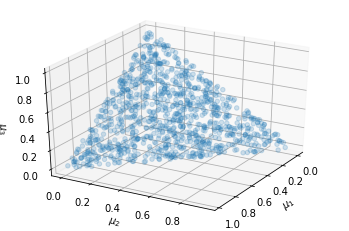

In [36]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import subplots
x = d.rvs(1000)
fig, ax = subplots(subplot_kw=dict(projection='3d'))
_=ax.scatter(x[:,0],x[:,1],x[:,2],marker='o',alpha=.2)
ax.view_init(30, 30) # elevation, azimuth
# ax.set_aspect(1)
_=ax.set_xlabel(r'$\mu_1$')
_=ax.set_ylabel(r'$\mu_2$')
_=ax.set_zlabel(r'$\mu_3$')
fig.savefig('fig-probability/Dirichlet_001.png')

<!-- dom:FIGURE: [fig-probability/Dirichlet_001.png, width=500 frac=0.85] One
thousand samples from a Dirichlet distribution with $\boldsymbol{\alpha} =
[1,1,1]$  <div id="fig:Dirichlet_001"></div> -->
<!-- begin figure -->
<div
id="fig:Dirichlet_001"></div>

<p>One thousand samples from a Dirichlet
distribution with $\boldsymbol{\alpha} = [1,1,1]$</p>
<img src="fig-
probability/Dirichlet_001.png" width=500>

<!-- end figure -->


Notice that the
generated samples lie on the triangular simplex shown. The
corners of the
triangle correspond to each of the components in the
$\boldsymbol{\mu}$.  Using,
a non-uniform $\boldsymbol{\alpha}=[2,3,4]$ vector,
we can visualize the
probability density function using the `pdf` method on the
`dirichlet` object as
shown in [Figure](#fig:Dirichlet_002). By choosing the
$\boldsymbol{\alpha}\in
\mathbb{R}^3$, the peak of the density function can be
moved within the
corresponding triangular simplex.

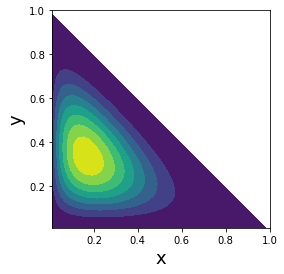

In [37]:
import numpy as np
from matplotlib.pylab import cm
X,Y = np.meshgrid(np.linspace(.01,1,50),np.linspace(.01,1,50))
d = dirichlet([2,3,4])
idx=(X+Y<1)
f=d.pdf(np.vstack([X[idx],Y[idx],1-X[idx]-Y[idx]]))
Z = idx*0+ np.nan
Z[idx] = f
fig,ax=subplots()
_=ax.contourf(X,Y,Z,cmap=cm.viridis)
ax.set_aspect(1)
_=ax.set_xlabel('x',fontsize=18)
_=ax.set_ylabel('y',fontsize=18)
fig.savefig('fig-probability/Dirichlet_002.png')

<!-- dom:FIGURE: [fig-probability/Dirichlet_002.png, width=500 frac=0.85]
Probability density function for the Dirichlet distribution with
$\boldsymbol{\alpha}=[2,3,4]$  <div id="fig:Dirichlet_002"></div> -->
<!-- begin
figure -->
<div id="fig:Dirichlet_002"></div>

<p>Probability density function
for the Dirichlet distribution with $\boldsymbol{\alpha}=[2,3,4]$</p>
<img
src="fig-probability/Dirichlet_002.png" width=500>

<!-- end figure -->


We
have seen that the Beta distribution generalizes the uniform distribution
over
the unit interval. Likewise, the Dirichlet distribution generalizes the
Beta
distribution over a vector with components in the unit interval. Recall
that
binomial distribution and the Beta distribution form a conjugate pair 
for
Bayesian inference because with $p\sim \texttt{Beta} $,

$$
X\vert p \sim \texttt{Binomial}(n,p)
$$

 That is, the data conditioned on $p$, is binomial distributed.
Analogously, the
multinomial distribution and the Dirichlet distribution also
form such a
conjugate pair with multinomial parameter $p\sim
\texttt{Dirichlet} $,

$$
X\vert p \sim \texttt{multinomial}(n,p)
$$

 For this reason, the Dirichlet-multinomial distribution is popular in
machine
learning text processing because non-zero probabilities can be assigned
to words
not specifically contained in specific documents, which helps
generalization
performance.


## Negative Binomial Distribution


The negative binomial
distribution is used to characterize the number
of trials until a specified
number of  failures ($r$) occurs.  For
example, suppose `1` indicates failure
and `0` indicates success. Then
the negative binomial distribution characterizes
the probability of a
`k=6` long sequence that has two (`r=2`) failures, with the
sequence
terminating in a failure (e.g., `001001`) with
$\mathbb{P}(1)=1/3$.
The length of the sequence is `6`, so for the
negative binomial distribution,
$\mathbb{P}(6-2)=\frac{80}{729}$.

The probability mass function is the
following:

$$
\mathbb{P}(k) = \binom{n+k-1}{n-1} p^n (1-p)^k
$$

 where $p$ is the probability of failure. The mean and
variance of this
distribution is the following:

$$
\mathbb{E}(k) =\frac{n (1-p)}{p}
$$

$$
\mathbb{V}(k) = \frac{n (1-p)}{p^2}
$$

 The following simulation shows an example
sequence generated for the negative
binomial distribution.

In [38]:
import random
n=2    # num of failures
p=1/3  # prob of failure
nc = 0 # counter
seq= []
while nc< n:
    v,=random.choices([0,1],[1-p,p])
    seq.append(v)
    nc += (v == 1)

seq,len(seq)

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 15)

Keep in mind that the negative binomial distribution characterizes 
the family
of such sequences with the specified number of failures.

## Negative
Multinomial Distribution


The discrete negative multinomial distribution is an
extension of the negative
binomial distribution to account for more than two
possible outcomes. That is,
there are other alteratives whose respective
probabilities sum to one less the
failure probability,  $p_{f} = 1-\sum_{k=1}^n
p_i$.  For example, a random
sample from this distribution with parameters $n=2$
(number of observed
failures) and with $p_a= \frac{1}{3}, p_b=\frac{1}{2}$ means
that the failure
probability, $p_f=\frac{1}{6}$. Thus, a sample from this
distribution like
$[ 2,9]$ means that `2` of the $a$ objects were observed in
the
sequence, `9` of the $b$ objects were observed, and there were two failure
symbols (say, `F`) with one of them at the end of the sequence.

The probability
mass function is the following:

$$
\mathbb{P}(\mathbf{k})= (n)_{\sum_{i=0}^m k_i} p_f^{n} \prod_{i=1}^m
\frac{p_i^{k_i}}{k_i!}
$$

 where $p_f$ is the probability of failure and the other $p_i$ terms
are the
probabilities of the other alternatives in the sequence. The 
$(a)_n$ notation
is the rising factorial function (e.g., $a_3 = a (a+1)(a+2)$).
The mean and
variance of this distribution is the
following:

$$
\mathbb{E}(\mathbf{k}) =\frac{n}{p_f} \mathbf{p}
$$

$$
\mathbb{V}(k) = \frac{n}{p_f^2} \mathbf{p} \mathbf{p}^T +
\frac{n}{p_f}\diag(\mathbf{p})
$$

 The following simulation shows the sequences generated for the
negative
multinomial distribution.

In [39]:
import random
from collections import Counter
n=2                   # num of failure items
p=[1/3,1/2]           # prob of other non-failure items
items = ['a','b','F'] # F marks failure item
nc = 0                # counter
seq= []
while nc< n:
    v,=random.choices(items,p+[1-sum(p)])
    seq.append(v)
    nc += (v == 'F')

c=Counter(seq)
print(c)

Counter({'a': 3, 'b': 2, 'F': 2})


The values of the `Counter` dictionary above are the $\mathbf{k}$ 
vectors in
the probability mass function for the negative multinomial distribution.
Importantly, these are not the probabilities of a particular sequence, but 
of a
family of sequences with the same corresponding `Counter` values. 
The
probability mass function implemented in Python is the following,

In [40]:
from scipy.special import factorial
import numpy as np
def negative_multinom_pdf(p,n):
    assert len(n) == len(p)
    term = [i**j for i,j in zip(p,n)]
    num=np.prod(term)*(1-sum(p))*factorial(sum(n))
    den = np.prod([factorial(i) for i in n])
    return num/den

Evaluating this with the prior `Counter` result,

In [41]:
negative_multinom_pdf([1/3,1/2],[c['a'],c['b']])

0.015432098765432103